In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

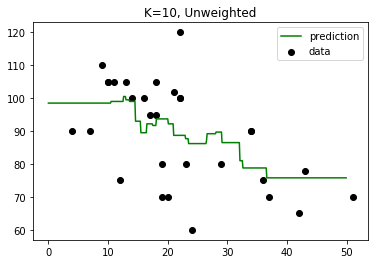

In [15]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, .1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

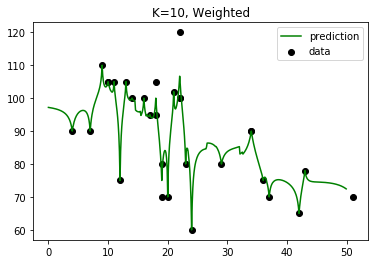

In [19]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print(score)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print(score_w)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

[-0.02698589 -0.08640354 -0.3672249  -0.70791367  0.26967692]
Unweighted Accuracy: -0.18 (+/- 0.66)
[ 0.59952353  0.00116128 -0.00730501 -0.65487951  0.61587523]
Weighted Accuracy: 0.11 (+/- 0.94)


# DRILL 
Why don't you add the other feature and mess around with  kk  and weighting to see if you can do any better than we've done so far?

In [45]:
#attempts with weighting
for i in range(3,20,1):
    knn_a = neighbors.KNeighborsRegressor(n_neighbors=i, weights='distance')
    X = pd.DataFrame(music.loudness)
    Y = music.bpm
    knn_a.fit(X, Y)

    # Set up our prediction line.
    T = np.arange(0, 50, 0.1)[:, np.newaxis]

    Y_ = knn_a.predict(T)

#plt.scatter(X, Y, c='k', label='data')
#plt.plot(T, Y_, c='g', label='prediction')
#plt.legend()
#plt.title('K=4, Weighted')
#plt.show()
    score_a = cross_val_score(knn_a, X, Y, cv=5)
#print(score_a)
    print(i,": Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_a.mean(), score_a.std() * 2))

3 : Weighted Accuracy: 0.14 (+/- 0.84)
4 : Weighted Accuracy: 0.16 (+/- 0.86)
5 : Weighted Accuracy: 0.12 (+/- 0.93)
6 : Weighted Accuracy: 0.17 (+/- 0.82)
7 : Weighted Accuracy: 0.10 (+/- 0.98)
8 : Weighted Accuracy: 0.10 (+/- 0.98)
9 : Weighted Accuracy: 0.12 (+/- 0.93)
10 : Weighted Accuracy: 0.11 (+/- 0.94)
11 : Weighted Accuracy: 0.13 (+/- 0.87)
12 : Weighted Accuracy: 0.13 (+/- 0.83)
13 : Weighted Accuracy: 0.14 (+/- 0.80)
14 : Weighted Accuracy: 0.14 (+/- 0.78)
15 : Weighted Accuracy: 0.13 (+/- 0.79)
16 : Weighted Accuracy: 0.14 (+/- 0.76)
17 : Weighted Accuracy: 0.14 (+/- 0.76)
18 : Weighted Accuracy: 0.14 (+/- 0.74)
19 : Weighted Accuracy: 0.13 (+/- 0.75)


In [46]:
#attempts without weighting:
for i in range(3,20,1):
    knn_a = neighbors.KNeighborsRegressor(n_neighbors=i)
    X = pd.DataFrame(music.loudness)
    Y = music.bpm
    knn_a.fit(X, Y)

    # Set up our prediction line.
    T = np.arange(0, 50, 0.1)[:, np.newaxis]

    Y_ = knn_a.predict(T)

#plt.scatter(X, Y, c='k', label='data')
#plt.plot(T, Y_, c='g', label='prediction')
#plt.legend()
#plt.title('K=4, Weighted')
#plt.show()
    score_a = cross_val_score(knn_a, X, Y, cv=5)
#print(score_a)
    print(i,": Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score_a.mean(), score_a.std() * 2))

3 : Unweighted Accuracy: 0.07 (+/- 0.68)
4 : Unweighted Accuracy: -0.04 (+/- 0.87)
5 : Unweighted Accuracy: -0.28 (+/- 1.20)
6 : Unweighted Accuracy: -0.18 (+/- 0.94)
7 : Unweighted Accuracy: -0.25 (+/- 1.07)
8 : Unweighted Accuracy: -0.25 (+/- 0.90)
9 : Unweighted Accuracy: -0.18 (+/- 0.74)
10 : Unweighted Accuracy: -0.18 (+/- 0.66)
11 : Unweighted Accuracy: -0.09 (+/- 0.42)
12 : Unweighted Accuracy: -0.10 (+/- 0.46)
13 : Unweighted Accuracy: -0.08 (+/- 0.44)
14 : Unweighted Accuracy: -0.06 (+/- 0.47)
15 : Unweighted Accuracy: -0.09 (+/- 0.42)
16 : Unweighted Accuracy: -0.04 (+/- 0.36)
17 : Unweighted Accuracy: -0.05 (+/- 0.33)
18 : Unweighted Accuracy: -0.04 (+/- 0.29)
19 : Unweighted Accuracy: -0.07 (+/- 0.28)


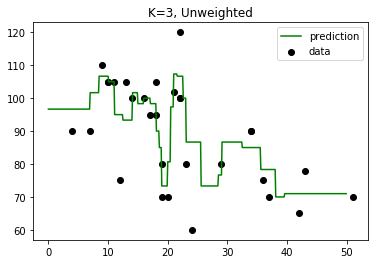

Unweighted Accuracy: 0.07 (+/- 0.68)


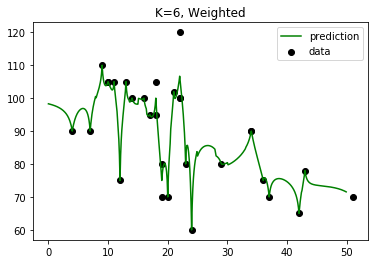

Unweighted Accuracy: 0.17 (+/- 0.82)


In [47]:
#Compare the best options from each run:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)
T = np.arange(0, 50, .1)[:, np.newaxis]
Y_ = knn.predict(T)
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=3, Unweighted')
plt.show()
score_u = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score_u.mean(), score_u.std() * 2))


knn_w = neighbors.KNeighborsRegressor(n_neighbors=6, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)
T = np.arange(0, 50, 0.1)[:, np.newaxis]
Y_ = knn_w.predict(T)
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=6, Weighted')
plt.show()
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))


In [ ]:
#Despite maximizing the R-squared, these models clearly overfit. There probably isn't a meaningful model that exists for this data